# Clustering

### Introduction
In this section I will be performing clustering using three different types of clustering. Clustering is an unsupervised learning technique that aims to discover groups or clusters within unlabeled data based on similarity or distance in a feature space. The main goal is to reveal the internal structure of the data, aiding in knowledge discovery through pattern identification and facilitating subset selection to manage large datasets. For this project I will be performing clustering on the NBA combine dataset without label features. Through this analysis, I hope to see if new insights can be revealed about the NBA combine event results and their relation to vertical jump through clustering.

### Theory

I will now be explaining the three clustering methods I will be using: K-means, DBSCAN, and Hierarchical.

K-means clustering uses an algorithm to cluster and group data points based on centroids or the center of a cluster. K-means creates clusters based on a set k clusters, where the centroid is the mean of the data points in a given cluster. It does this by repeatedly assigning points to the nearest centroid, adjusting the centroids, and repeating until the data is divided into k clusters based on their average locations. Parameters for the model can be tuned and selected in a variety of ways including the elbow method and silhouette analysis. The elbow method is done by running K-means for various k values, and plotting metrics like distortion, inertia, and silhouette score, and identifying the "elbow" point in the plot where increasing k yields diminishingly better results as the optimal k. Silhouette Analysis measures cohesion and separation, yielding a silhouette score to identify the optimal number of clusters.

DBSCAN or Density-Based Spatial Clustering of Applications with Noise is a density-based cluster identification method that recognizes clusters as dense point regions separated by low-density areas from other high-density regions. DBSCAN is an algorithm that groups closely packed points based on their proximity, identifying outliers as points in low-density regions with distant neighbors. This clustering method is useful for irregular or intertwined clusters and datasets that have a lot of noise and outliers. The elbow and silhouette method can also be used to tune parameters for the model, like eps and minimum sample size. In DBSCAN eps defines the maximum distance between two points for one to be considered in the neighborhood of the other, while the minimum sample size parameter the minimum number of points required to form a region. These can be graphed with the corresponding silhouette score and the model can be tuned accordingly.

Hierarchical clustering organizes data into nested clusters, forming a hierarchical tree-like structure. It doesn't assume a predetermined number of clusters as k-means does. In the agglomerative approach, which I will be using in this section. Each observation begins in its own cluster, and clusters are progressively merged as one ascends the hierarchy in a bottom-up fashion. A useful tool for visualizing and selecting the number of clusters for agglomerative clustering is through a dendrogram. A dendrogram is a tree-like diagram that represents the hierarchical structure of clusters in hierarchical clustering, showcasing the order and manner in which clusters merge, going up from each individual datapoint. It can show where there are natural breaks in clusters along different differences, which can be very useful for selecting the number of clusters to have.


## K-Means Clustering
For K-means clustering, I used the NBA combine dataset without label features as X. I normalized X, and tuned for the optimal number of clusters by using the elbow method. I did this by looping through values for the number of clusters, and plotted the resulting distortion and inertia. I then found the elbow point in the graph where both were minimized and increasing the number of clusters would produce diminishing lower values for inertia and distortion. I then plotted the clusters as colors on a scatter plot with ‘body fat’ and ‘three quarter sprint speed’ as the x and y axis. I chose to plot the clusters with these features since these two features were the two selected when I performed feature selection for the best two features in the Naive Bayes section.

In [185]:
#| code-fold: true
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

combine_df = pd.read_csv("../../data/01-modified-data/ccleaned_NBA_combine_no_NA.csv")

label_vec = combine_df["above_max_vert_mean"]
drop_cols = ["Unnamed: 0", "POS", "combine_year", "Name"]
feature_matrix = combine_df.drop(columns= drop_cols)
db_matrix = feature_matrix[['BODY.FAT', 'THREE.QUARTER.SPRINT']]
feature_cols = feature_matrix.columns.tolist()

X = feature_matrix
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

db_X = db_matrix
scaler = StandardScaler()
db_X_normalized = scaler.fit_transform(db_X)


In [220]:
#| code-fold: true
clusters = range(1,10)
kmeans_list = []
inertia_list = []
distortion_list = []

for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_normalized)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    

    distortion = 0
    for i in range(len(X_normalized)):
        cluster_index = labels[i]
        distortion += np.linalg.norm(X_normalized[i]-centroids[cluster_index])**2
    distortion /= len(X_normalized)
    distortion_list.append(distortion)
    inertia = kmeans.inertia_
    kmeans_list.append(k)
    inertia_list.append(inertia)

df = pd.DataFrame({"Clusters": kmeans_list, "Distortion": distortion_list, "Inertia": inertia_list})
df.head(10)


,Clusters,Distortion,Inertia
0,1,18.000000,4086.000000
1,2,13.396373,3040.976684
2,3,11.664875,2647.926702
3,4,10.489848,2381.195597
4,5,9.899263,2247.132813
5,6,9.424941,2139.461719
6,7,8.994443,2041.738467
7,8,8.582387,1948.201760
8,9,8.273089,1877.991115


Text(0, 0.5, 'Distortion')

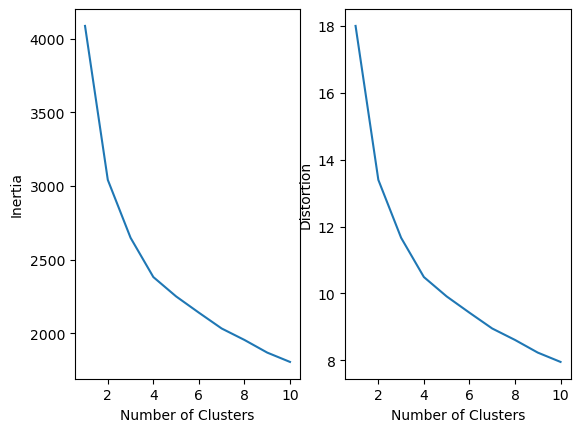

In [172]:
#| code-fold: true
fig, ax = plt.subplots(1, 2)
ax[0].plot(df['Clusters'], df['Inertia'])
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')
ax[1].plot(df['Clusters'], df['Distortion'])
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Distortion')

In [218]:
#| code-fold: true
optimal_k = 5  

kmeans = KMeans(n_clusters= optimal_k, n_init=10)
kmeans.fit(X_normalized)
y_pred = kmeans.predict(X_normalized)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

k_df = pd.DataFrame(X_normalized, columns=feature_cols)
k_df['cluster_label'] = y_pred
print(k_df)



       HEIGHT    WEIGHT       BMI  BODY.FAT  STANDING.REACH  WINGSPAN  \
0    0.769218 -0.124133 -1.043761 -1.416146        0.827347  0.440841   
1   -1.130396 -1.386806 -0.901057 -0.750390       -1.627656 -1.774516   
2    0.313311 -0.484897 -1.089426 -0.037080        0.009012 -0.065527   
3   -1.282365 -1.292321 -0.552860 -0.797944       -1.013905 -0.825078   
4    0.161342  0.408423  0.463190 -0.274850       -0.195571 -0.255414   
..        ...       ...       ...       ...             ...       ...   
222  0.541264  0.399833 -0.010586  0.723785        0.622763  0.694024   
223 -0.142597  0.880852  1.593403  0.438461       -0.809322  0.694024   
224 -0.066612  0.365475  0.680099  1.199325        0.213596 -0.065527   
225  1.681032  0.451371 -1.197881  1.009109        1.543389  0.947208   
226  1.681032  0.803545 -0.718397 -0.845498        0.622763  0.124361   

     HAND.LENGTH  HAND.WIDTH  STANDING.VERTICAL  MAX.VERTICAL  LANE.AGILITY  \
0       0.592763    0.582597           0.240

<Axes: xlabel='BODY.FAT', ylabel='THREE.QUARTER.SPRINT'>

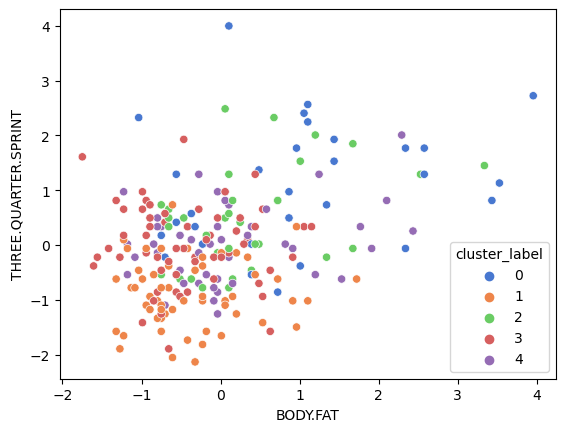

In [219]:
#| code-fold: true
import seaborn as sns

sns.scatterplot(data=k_df, x='BODY.FAT', y='THREE.QUARTER.SPRINT', hue = 'cluster_label', palette = 'muted')


### Analysis

The optimal number of clusters for k-means was around 4-6 based on the elbow method. I chose to use 5 as the optimal number for my final k-means clustering. When plotted with ‘body fat’ and ‘three quarter sprint speed’ as the x and y axis, the clusters appear to overlap each other a lot. Each individual cluster and its shape can be made out and the area they span differ, but they overlap a lot, especially at one spot on the plot. Suggesting that k-means clustering is not able to greatly differentiate within the feature space. 

## DBSCAN Clustering

For DBSCAN clustering, I used just the features, 'body fat' and 'three-quarter sprint speed'. DBSCAN would not properly predict labels for the nba combine dataset if it contained more than two features, and those two features were the the two selected when I performed feature selection for the best two features. I then hyper-parameter tuned by using the elbow method for eps and minimum sample size based on silhouette score. I then graphed the resulting clusters with 'body fat' and ‘max vertical’ as the x and y axis, as I was interested to see if the clustering could provide any insights in that feature space, and the 'body fat' and 'three-quarter sprint speed' were the only 2 features used to perform clustering.

In [228]:
#| code-fold: true
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_values = [1, 2, 3, 4, 5, 6]


silhouette_scores = []
eps_param = []
min_samp = []


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(db_X_normalized)

        if len(set(labels)) > 1:
            silhouette = silhouette_score(db_X_normalized, labels)
            silhouette_scores.append(silhouette)
            eps_param.append(eps)
            min_samp.append(min_samples)

result_df = pd.DataFrame({"eps_value": eps_param, "min_samples": min_samp, "silhouette_score": silhouette_scores})

result_df.head()



,eps_value,min_samples,silhouette_score
0,0.1,1,0.196753
1,0.1,2,-0.066301
2,0.1,3,-0.184751
3,0.1,4,-0.336292
4,0.1,5,-0.385632


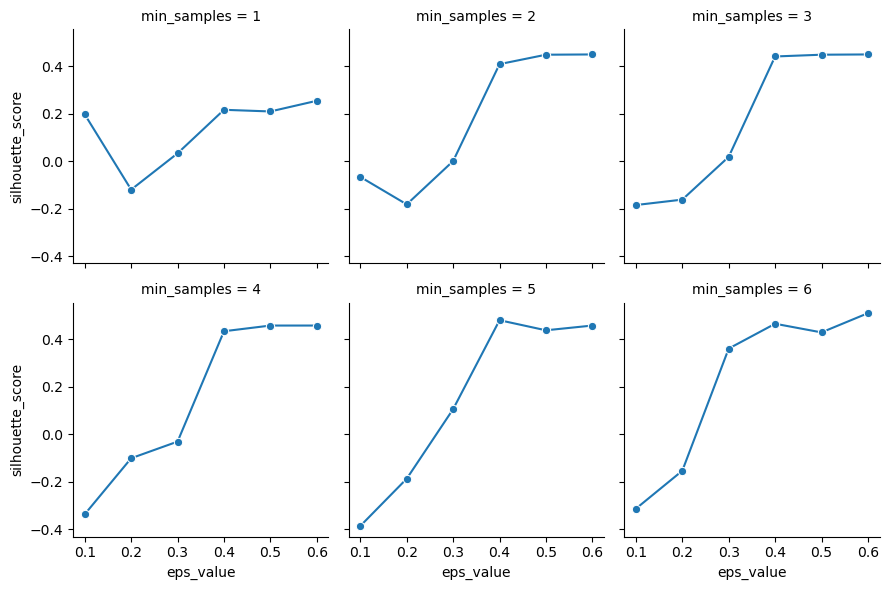

In [195]:
#| code-fold: true

min_samples_values = [1, 2, 3, 4, 5, 6]
graph = sns.FacetGrid(result_df, col="min_samples", col_wrap=3)
graph.map_dataframe(sns.lineplot, x="eps_value", y="silhouette_score", marker='o')

<Axes: xlabel='BODY.FAT', ylabel='MAX.VERTICAL'>

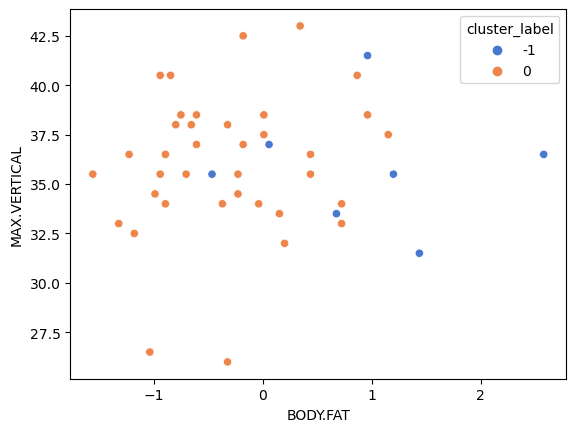

In [225]:
#| code-fold: true
dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(db_X_normalized)

dbscan_df = pd.DataFrame(db_X_normalized, columns=['BODY.FAT','THREE.QUARTER.SPRINT'])
dbscan_df['cluster_label'] = labels
dbscan_df['MAX.VERTICAL'] = combine_df['MAX.VERTICAL']

sns.scatterplot(data=dbscan_df, x='BODY.FAT', y='MAX.VERTICAL', hue = 'cluster_label', palette = 'muted')


### Analysis
The hyper-parameter tuning revealed the ideal parameters for eps and minimum sample size were 0.4 and 5 respectively. The plotted clustering with  'body fat' and ‘max vertical’ as the x and y axis did not have much pattern to it. There were only two cluster labels, a few of each. There was not much insight to be taken out other than the two selected features do not produce distinct clusters within the graphed feature space.

## Hierarchical Clustering

For Hierarchical clustering, I used the NBA combine dataset without label features as X. I first created a dendrogram to visualize the clustering and select an optimal threshold to select the optimal number of clusters at a natural distance. I then plotted the clusters with ‘body fat’ and ‘three quarter sprint speed’ as the x and y axis.

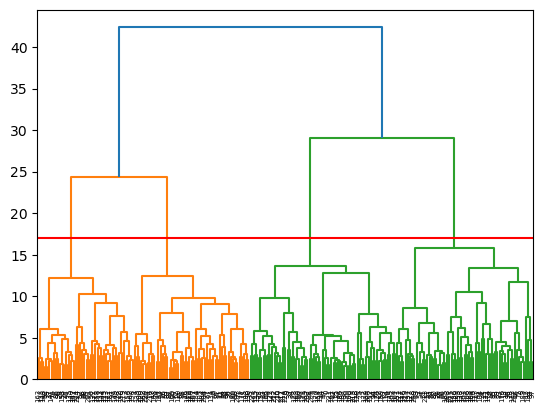

In [199]:
#| code-fold: true
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(X_normalized, method="ward")
dendrogram(linkage_matrix)

threshold = 17
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()

<Axes: xlabel='BODY.FAT', ylabel='THREE.QUARTER.SPRINT'>

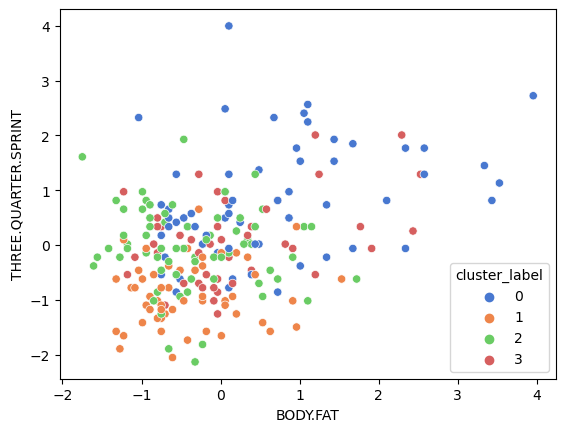

In [227]:
#| code-fold: true
cluster = AgglomerativeClustering(n_clusters=4)
labels = cluster.fit_predict(X_normalized)
agg_df = pd.DataFrame(X_normalized, columns=feature_cols)
agg_df['cluster_label'] = labels


sns.scatterplot(data=agg_df, x='BODY.FAT', y='THREE.QUARTER.SPRINT', hue = 'cluster_label', palette = 'muted')

### Analysis

The dendrogram showed that a natural cutoff point was at 4 clusters, as the splits in the dendrogram became much more sporadic after. The resulting plot with cluster labels as colors the clusters once again appeared to overlap each other. The clusters were distinct in terms of the area and shape of each one, but there was a lot of overlap. Again suggesting that the clustering is not able to greatly differentiate when plotted in that feature space. 

## Conclusions

Clustering the nba combine dataset using three different clustering algorithms in K-means, DBSCAN, and Hierarchical clustering and plotting for the features 'body fat' and 'three-quarter sprint speed', revealed a common theme of significant overlap among the clusters in the plotted feature space. For K-means, the optimal number of clusters, determined through the elbow method, was selected as 5. However, when visualizing the clusters in the feature space, significant overlap was observed, indicating that K-means struggled to differentiate within this space. Similarly, DBSCAN, after hyper-parameter tuning, did not reveal meaningful patterns in the plotted clusters, suggesting that the chosen features might not be conducive to distinctive clustering. Hierarchical clustering, with a natural cutoff point at 4 clusters, also exhibited overlapping clusters when visualized. These findings collectively suggest that the data may lack distinctiveness for effective clustering. Further exploration to find new distinct insights within the NBA combine dataset could be sought with alternative features or clustering techniques, however there may also not be further insights to be found.